## Motivation

Crime is a major concern in many cities around the world. Society is always looking for ways to reduce crime rates and make cities safer. If we don't feel safe walking around our city, we can't enjoy the city's amenities or be as happy and productive as we could be. Therefore, our goal with this project is firstly to identify which crimes are the most important for travelers and residents in a city. As New york is one of the largest and most visited cities in the world, we chose to analyze the crime data of this city, as it has abundant and free data available, as well as a large number of crimes reported. Another goal is to identify when and where these crimes occur most frequently so that we can provide a tool to help people make informed decisions about their safety while travelling or working and living in New York City. Finally, the last goal is to examine how socio-economic factors and other variables can influence or help explain crimes rates in the city. This will ultimately help people stay safe and make better decisions about where to live, work, and travel in New York City.


- What is your dataset?

Our chosen dataset is the New York City Police Department (NYPD) Complaint Data Historic [dataset](https://data.cityofnewyork.us/d/qgea-i56i?category=Public-Safety&view_name=NYPD-Complaint-Data-Historic) which can be found on the [NYC Open Data](https://opendata.cityofnewyork.us/) website. The dataset includes all valid felony, misdemeanor, and violation crimes reported to the New York City Police Department (NYPD) from 2006 to 23rd april 2024. We have downloaded it on 23 April 2024. 

- Why did you choose this/these particular dataset(s)?

The reason this dataset was chosen is because it is the largest and most comprehensive dataset available for crimes in New York City. We therefore felt it would be most representative of the true crime rates, and would give us room to narrow our datastory into something more specific, and still have enough data to accurately convey our message.

- What was your goal for the end user's experience?

We want the user to be able to get a glimpse into which crimes are important to look out for, and give them a tool in which they are explore the data further with socio-economic overlays, as well as plot a route which avoids crime hotspots. 

## Basic Stats

- Write about your choices in data cleaning and preprocessing


**Data Cleaning**

In [4]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import json
import os

# Load the NYPD policing data
cwd = os.getcwd()
parent_dir = os.path.dirname(cwd)
filename = 'NYPD_Complaint_Data_Historic_20240423.csv' # Note that this file is not included in the repository as it is too large
# You must therefore download the file from: https://data.cityofnewyork.us/Public-Safety/NYPD-Complaint-Data-Historic/qgea-i56i?category=Public-Safety&view_name=NYPD-Complaint-Data-Historic
df = pd.read_csv(filename)
df_original = df.copy()

C:\Users\ollie\AppData\Local\Temp\ipykernel_30020\442825150.py:15: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filename)


In [5]:
# The dataset size
print('Total number of crimes', len(df)) # 8.5 million rows
# Number of variables
print("Variables: ", df.shape[1]) # 35 columns
# Show first 5 rows with all columns
df.head()

Total number of crimes 8496991
Variables:  35


,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,ADDR_PCT_CD,RPT_DT,KY_CD,OFNS_DESC,PD_CD,...,SUSP_SEX,TRANSIT_DISTRICT,Latitude,Longitude,Lat_Lon,PATROL_BORO,STATION_NAME,VIC_AGE_GROUP,VIC_RACE,VIC_SEX
0,16784525,06/17/2006,00:30:00,NaN,(null),6.0,06/18/2006,578,HARRASSMENT 2,638.0,...,F,NaN,40.734091,-74.006238,"(40.734091, -74.006238)",PATROL BORO MAN SOUTH,(null),45-64,WHITE,F
1,10973318,04/06/2006,09:30:00,NaN,(null),6.0,04/12/2006,578,HARRASSMENT 2,638.0,...,F,NaN,40.741288,-74.006167,"(40.741288, -74.006167)",PATROL BORO MAN SOUTH,(null),45-64,WHITE,F
2,23859785,08/12/2006,11:29:00,NaN,(null),20.0,08/12/2006,105,ROBBERY,361.0,...,M,NaN,40.775083,-73.982182,"(40.775083, -73.982182)",PATROL BORO MAN NORTH,(null),(null),UNKNOWN,D
3,16544671,05/22/2006,16:30:00,NaN,(null),47.0,05/22/2006,105,ROBBERY,380.0,...,M,NaN,40.903862,-73.846994,"(40.903862, -73.846994)",PATROL BORO BRONX,(null),25-44,WHITE,M
4,16856905,06/01/2005,00:01:00,06/18/2006,11:00:00,NaN,06/21/2006,104,RAPE,153.0,...,M,NaN,NaN,NaN,NaN,(null),(null),<18,BLACK,F


In [6]:
# Renaming columns for better readability
df = df.rename(columns={
    'CMPLNT_NUM': 'Complaint_ID',
    'ADDR_PCT_CD': 'Precinct',
    'BORO': 'Borough',
    'BORO_NM': 'Borough_Name',
    'CMPLNT_FR_DT': 'Complaint_From_Date',
    'CMPLNT_FR_TM': 'Complaint_From_Time',
    'CMPLNT_TO_DT': 'Complaint_To_Date',
    'CMPLNT_TO_TM': 'Complaint_To_Time',
    'CRM_ATPT_CPTD_CD': 'Crime_Completed',
    'HADEVELOPT': 'NYCHA_Housing',
    'HOUSING_PSA': 'Housing_PSA',
    'JURISDICTION_CODE': 'Jurisdiction_Code',
    'JURIS_DESC': 'Jurisdiction_Description',
    'KY_CD': 'Offense_Code',
    'LAW_CAT_CD': 'Offense_Level',
    'LOC_OF_OCCUR_DESC': 'Location_Type',
    'OFNS_DESC': 'Offense_Description',
    'PARKS_NM': 'Park_Name',
    'PATROL_BORO': 'Patrol_Borough',
    'PD_CD': 'Internal_Classification_Code',
    'PD_DESC': 'Internal_Classification_Description',
    'PREM_TYP_DESC': 'Premises_Type',
    'RPT_DT': 'Report_Date',
    'STATION_NAME': 'Transit_Station_Name',
    'SUSP_AGE_GROUP': 'Suspect_Age_Group',
    'SUSP_RACE': 'Suspect_Race',
    'SUSP_SEX': 'Suspect_Sex',
    'TRANSIT_DISTRICT': 'Transit_District',
    'VIC_AGE_GROUP': 'Victim_Age_Group',
    'VIC_RACE': 'Victim_Race',
    'VIC_SEX': 'Victim_Sex',
    'X_COORD_CD': 'X_Coordinate',
    'Y_COORD_CD': 'Y_Coordinate',
    'Latitude': 'Latitude',
    'Longitude': 'Longitude'
})

In [7]:
# Clean data

#Number of initial NaN values: 10 110 435
#Number of "(null)" string values: 50 220 416
#Number of "UNKNOWN" string values: 6 204 102
#True number of NaN values: 66 534 953

# replace all "(null)" and "UNKNOWN" values with Nan in one loop so .isna() can be used
values_to_replace = ['(null)', 'UNKNOWN']
df.replace(values_to_replace, np.nan, inplace=True)
# count true NaN values
nan_count = df.isna().sum().sum()
print(f'True number of NaN values: {nan_count}') # 66.5 mil

True number of NaN values: 66534953


In [8]:
# Percentage of missing values in each column
(df.isna().sum()/df.shape[0]*100).sort_values(ascending=False)

NYCHA_Housing                          99.643474
Park_Name                              99.591761
Transit_District                       97.773565
Transit_Station_Name                   97.773565
Housing_PSA                            92.432015
Suspect_Age_Group                      66.353654
Suspect_Race                           58.202157
Suspect_Sex                            44.298340
Victim_Race                            32.586936
Victim_Age_Group                       30.994878
Complaint_To_Date                      21.083464
Complaint_To_Time                      21.022995
Location_Type                          20.467622
Premises_Type                           0.286396
Offense_Description                     0.222102
Internal_Classification_Code            0.085842
Internal_Classification_Description     0.085842
Borough_Name                            0.080876
Precinct                                0.008250
Complaint_From_Date                     0.007709
Patrol_Borough      

**Which columns can we remove?**

Looking at columns with over 1% missing values a qualitative assessment is made, as seen below:

Yes:

* NYCHA_Housing: Yes, as NYCHA_Housing is an organization that provides affordable housing in New York City, which is not relevant.
* Housing_PSA: Yes, as it is the Development Level Code and we have the geographical location
* Parks_Name, Transit_District, Transit_Station_Name: Yes, as the geographical location is already provided in the Latitude and Longitude columns.

No:


* Suspect and Victim: No, as we are looking for safer travel routes in NYC
* Complaint_To_Date and Complaint_To_Time columns: No, because they are important for certain crimes
  * E.g. Complaint ID: 16856905 was RAPE from 06/01/2005 00:01:00 to 06/18/2006 11:00:00 in precinct 104
* Location_Type: No, as it describes the location of the crime [inside, outside, front of, opposite of, rear of] relative to the Premises_Type [street, residence-house, commercial building,park/playground, etc]


**Which rows of columns should we remove?**

All columns with less than 1% missing values are obviously important when writing a police complaint entry, so we choose to remove rows with NaN values in these columns. 
To support this, we can see that these columns align with what we are looking for in the dataset. We need geograpical data (lat, long, borough), time  (from date), crime type. 


In [9]:
# We need geograpical data (lat, long, borough), time  (from date), crime type. 
# We will remove rows with NaN values in these columns.
important_columns = [
    'Jurisdiction_Code', 
    'Report_Date', 
    'Offense_Code', 
    'Offense_Level', 
    'Jurisdiction_Description', 
    'Complaint_ID',
    'Complaint_From_Date', 
    'Complaint_From_Time', 
    'Crime_Completed',
    'Victim_Sex',
    'Latitude', 
    'Longitude', 
    'Y_Coordinate', 
    'X_Coordinate', 
    'Lat_Lon',
    'Patrol_Borough',
    'Precinct',
    'Borough_Name',
    'Internal_Classification_Code',
    'Internal_Classification_Description',
    'Offense_Description',
    'Premises_Type']

# Drop rows with NaN values from important columns
df = df.dropna(subset=important_columns) # 8.44 mil rows left

# Remove these columns as they are not needed
# * NYCHA_Housing: Yes, as NYCHA_Housing is an organization that provides affordable housing in New York City, which is not relevant.
# * Housing_PSA: Yes, as it is the Development Level Code and we have the geographical location
# * Parks_Name, Transit_District, Transit_Station_Name: Yes, as the geographical location is already provided in the Latitude and Longitude columns.
df = df.drop(columns=['NYCHA_Housing', 'Housing_PSA', 'Park_Name', 'Transit_District', 'Transit_Station_Name'])

**Year exploration**

The Complaint_From_Date column has the date REPORTED, not the date of the crime
* Therefore some crimes are may be from before 2006
* If an incident results in a victims death, the incident is upgraded to murder and the date is changed to the date of victims death!
* If there is a Complain_To_Date the crime occured in a time range.

In [10]:
# Check years for anomalies
years = df['Complaint_From_Date'].str.split('/').str[-1] # e.g. split '06/17/2006' into '2006'
# convert to int and sort 
unique_years = years.astype(int).sort_values().unique()
crime_counts_per_year = years.value_counts().sort_index()
# display max rows none
pd.set_option('display.max_rows', None)
print('Unique years:', unique_years, 'Counts:', crime_counts_per_year)

# Print how many crimes before 2006 and after 2019
print('Crimes before 2006:', len(df[years.astype(int) < 2006])) # 15k
print('Crimes after 2019:', len(df[years.astype(int) > 2019])) # 1.5mil
print('Crimes after 2022:', len(df[years.astype(int) > 2022])) # 129k

# Removing crimes before 2006 as it is inconsistent and biased. 
# And removing crimes after 2022 as it seems to be incomplete data
df = df[(years.astype(int) >= 2006) & (years.astype(int) <= 2022)]
print(" length of Df after removing years", len(df)) # 8.3 mil

Unique years: [1010 1011 1014 1015 1016 1017 1018 1019 1020 1021 1022 1024 1025 1026
 1027 1028 1029 1900 1905 1906 1908 1909 1910 1911 1912 1913 1914 1915
 1916 1917 1918 1919 1920 1921 1922 1924 1928 1929 1930 1938 1940 1941
 1942 1945 1946 1947 1948 1949 1950 1951 1954 1955 1956 1957 1958 1959
 1960 1961 1962 1964 1965 1966 1967 1968 1969 1970 1971 1972 1973 1974
 1975 1976 1977 1978 1979 1980 1981 1982 1983 1984 1985 1986 1987 1988
 1989 1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002
 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016
 2017 2018 2019 2020 2021 2022 2023 2024] Counts: 1010         6
1011         3
1014         1
1015         9
1016        18
1017        24
1018        26
1019        13
1020         2
1021         7
1022        10
1024         1
1025         1
1026         5
1027         3
1028        10
1029         4
1900         6
1905         2
1906         1
1908         3
1909         3
1910         9
1911         8
1912    

Crime counts per year:
* From 2006 to 2022 we have ~500k reports per year
* 2023 is a uniquely low count at ~6k
* 2024 is at ~123k becuase its only from before 23rd April

We choose to only keep data between 2006 to 2022 

**Crime types**

A crime complaint only shows the most serious offense, even if it involved mulitple offenses. 
* Attempted crimes also shown, even if unsuccessful

In [11]:
# Looking at the 25 most common crimes
focus_crimes = df['Offense_Description'].value_counts().head(25)

# Drop all other crimes except the focus_crimes
df = df[df['Offense_Description'].isin(focus_crimes.index)]

In [13]:
df.head()

,Complaint_ID,Complaint_From_Date,Complaint_From_Time,Complaint_To_Date,Complaint_To_Time,Precinct,Report_Date,Offense_Code,Offense_Description,Internal_Classification_Code,...,Suspect_Age_Group,Suspect_Race,Suspect_Sex,Latitude,Longitude,Lat_Lon,Patrol_Borough,Victim_Age_Group,Victim_Race,Victim_Sex
0,16784525,06/17/2006,00:30:00,NaN,NaN,6.0,06/18/2006,578,HARRASSMENT 2,638.0,...,45-64,WHITE,F,40.734091,-74.006238,"(40.734091, -74.006238)",PATROL BORO MAN SOUTH,45-64,WHITE,F
1,10973318,04/06/2006,09:30:00,NaN,NaN,6.0,04/12/2006,578,HARRASSMENT 2,638.0,...,18-24,WHITE,F,40.741288,-74.006167,"(40.741288, -74.006167)",PATROL BORO MAN SOUTH,45-64,WHITE,F
2,23859785,08/12/2006,11:29:00,NaN,NaN,20.0,08/12/2006,105,ROBBERY,361.0,...,NaN,WHITE,M,40.775083,-73.982182,"(40.775083, -73.982182)",PATROL BORO MAN NORTH,NaN,NaN,D
3,16544671,05/22/2006,16:30:00,NaN,NaN,47.0,05/22/2006,105,ROBBERY,380.0,...,NaN,BLACK,M,40.903862,-73.846994,"(40.903862, -73.846994)",PATROL BORO BRONX,25-44,WHITE,M
7,27287587,03/07/2007,16:10:00,NaN,NaN,14.0,03/07/2007,105,ROBBERY,361.0,...,NaN,BLACK,M,40.755640,-73.990952,"(40.75564, -73.990952)",PATROL BORO MAN SOUTH,NaN,NaN,D


In [12]:
# Export the cleaned data
df.to_csv('NYPD_Complaint_Data_Cleaned.csv', index=False) # index False as row number not needed

- Write a short section that discusses the dataset stats, containing key points/plots from your exploratory data analysis.

The basic dataset stats are given in the above code, but will be summarised here:
* Roughly 8.5 million entries with 35 columns, which we cleaned to about 8.3 million entries with 30 columns. 
* The cleaned dataset contains complaints reported from years between 2006 to 2022.
* Nan values and some columns were removed if there was reason to, based on a qualitative assessment.
* Crime types were filtered to the 25 most common crimes, to make sure there was enough data for a good analysis.

The most important columns for our analysis are related to the crime type, geograpical data (lat, long, borough, precinct), time, date and victim data.

Note that from the NYPD_Complaint_Incident_Level_Data_Footnotes which can be found under  [attachments](https://data.cityofnewyork.us/Public-Safety/NYPD-Complaint-Data-HistNYPD_Complaint_Incident_Level_Data_Footnotesric/qgea-i56i/about_data?category=Public-Safety&view_name=NYPD-Complaint-Data-Historic) there is additional information on the dataset. Such as, it is stated that certain locations are anonymised if there e.g. are related to rape or sex crimes to protect the victims identity.

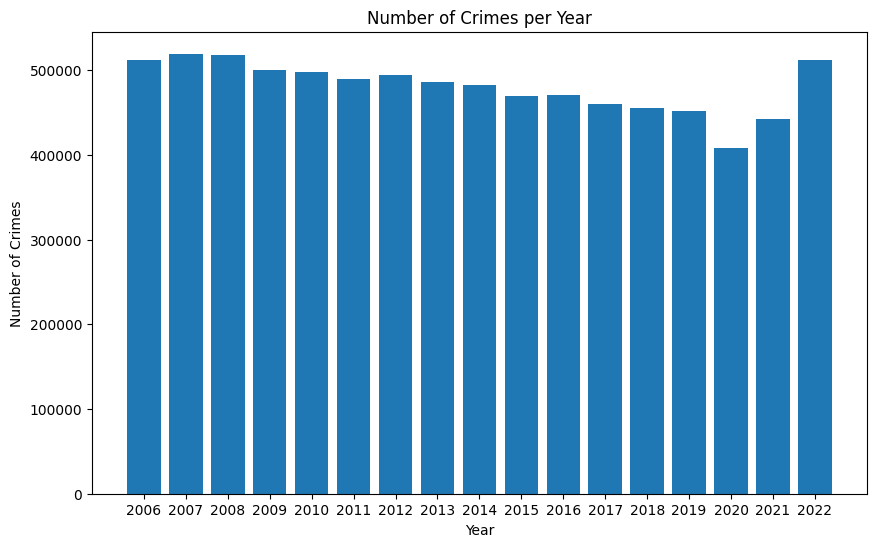

In [14]:
# Histogram over df years updated
years_updated = df['Complaint_From_Date'].str.split('/').str[-1]
crime_counts_per_year_updated = years_updated.value_counts().sort_index()
plt.figure(figsize=(10, 6))
plt.bar(crime_counts_per_year_updated.index, crime_counts_per_year_updated.values)
plt.title('Number of Crimes per Year')
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.show()

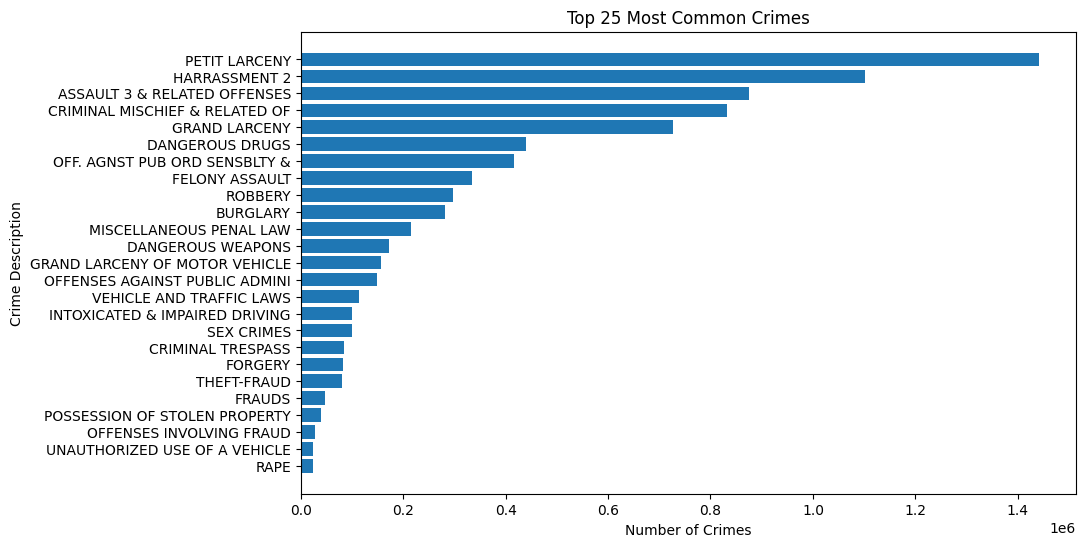

In [15]:
# Looking at the 25 most common crimes
focus_crimes = df['Offense_Description'].value_counts().head(25)
plt.figure(figsize=(10, 6))
plt.barh(focus_crimes.index, focus_crimes.values)
plt.title('Top 25 Most Common Crimes')
plt.xlabel('Number of Crimes')
plt.ylabel('Crime Description')
plt.gca().invert_yaxis()
plt.show()


## Data Analysis

- Describe your data analysis and explain what you've learned about the dataset.
- If relevant, talk about your machine-learning.

**FOR CLARITY OF THE EXPLAINER, THE DATA ANALYSIS IS DONE IN SEPARATE NOTEBOOKS AND REFERENCED. ONLY SELECT PLOTS ARE SHOWN HERE**

The data analysis plots are done in different notebooks as they are too large to have in one notebook. Selected plots are shown in this notebook to give an idea of the most important findings.

#### Temporal Data Analysis

The temporal data analysis is done in file "data analysis & preprocessing/temporal_plots.ipynb". Firstly, an analysis of all temporal changes for all top 25 most common crimes is done by Year, Month, Weekday, 24-Hour using multipanel bar plots. Here is an example of the Weekday and 24 plots as these were most relevant for travelling in NYC, since the yearly plot is hard to act upon, whereas a more managable hourly and weekday plot can be used to avoid crime hotspots. 

In [16]:
# Load cleaned data csv
filename = 'NYPD_Complaint_Data_Cleaned.csv'
df = pd.read_csv(filename)
df_cleaned = df.copy()
focuscrimes = df['Offense_Description'].unique()


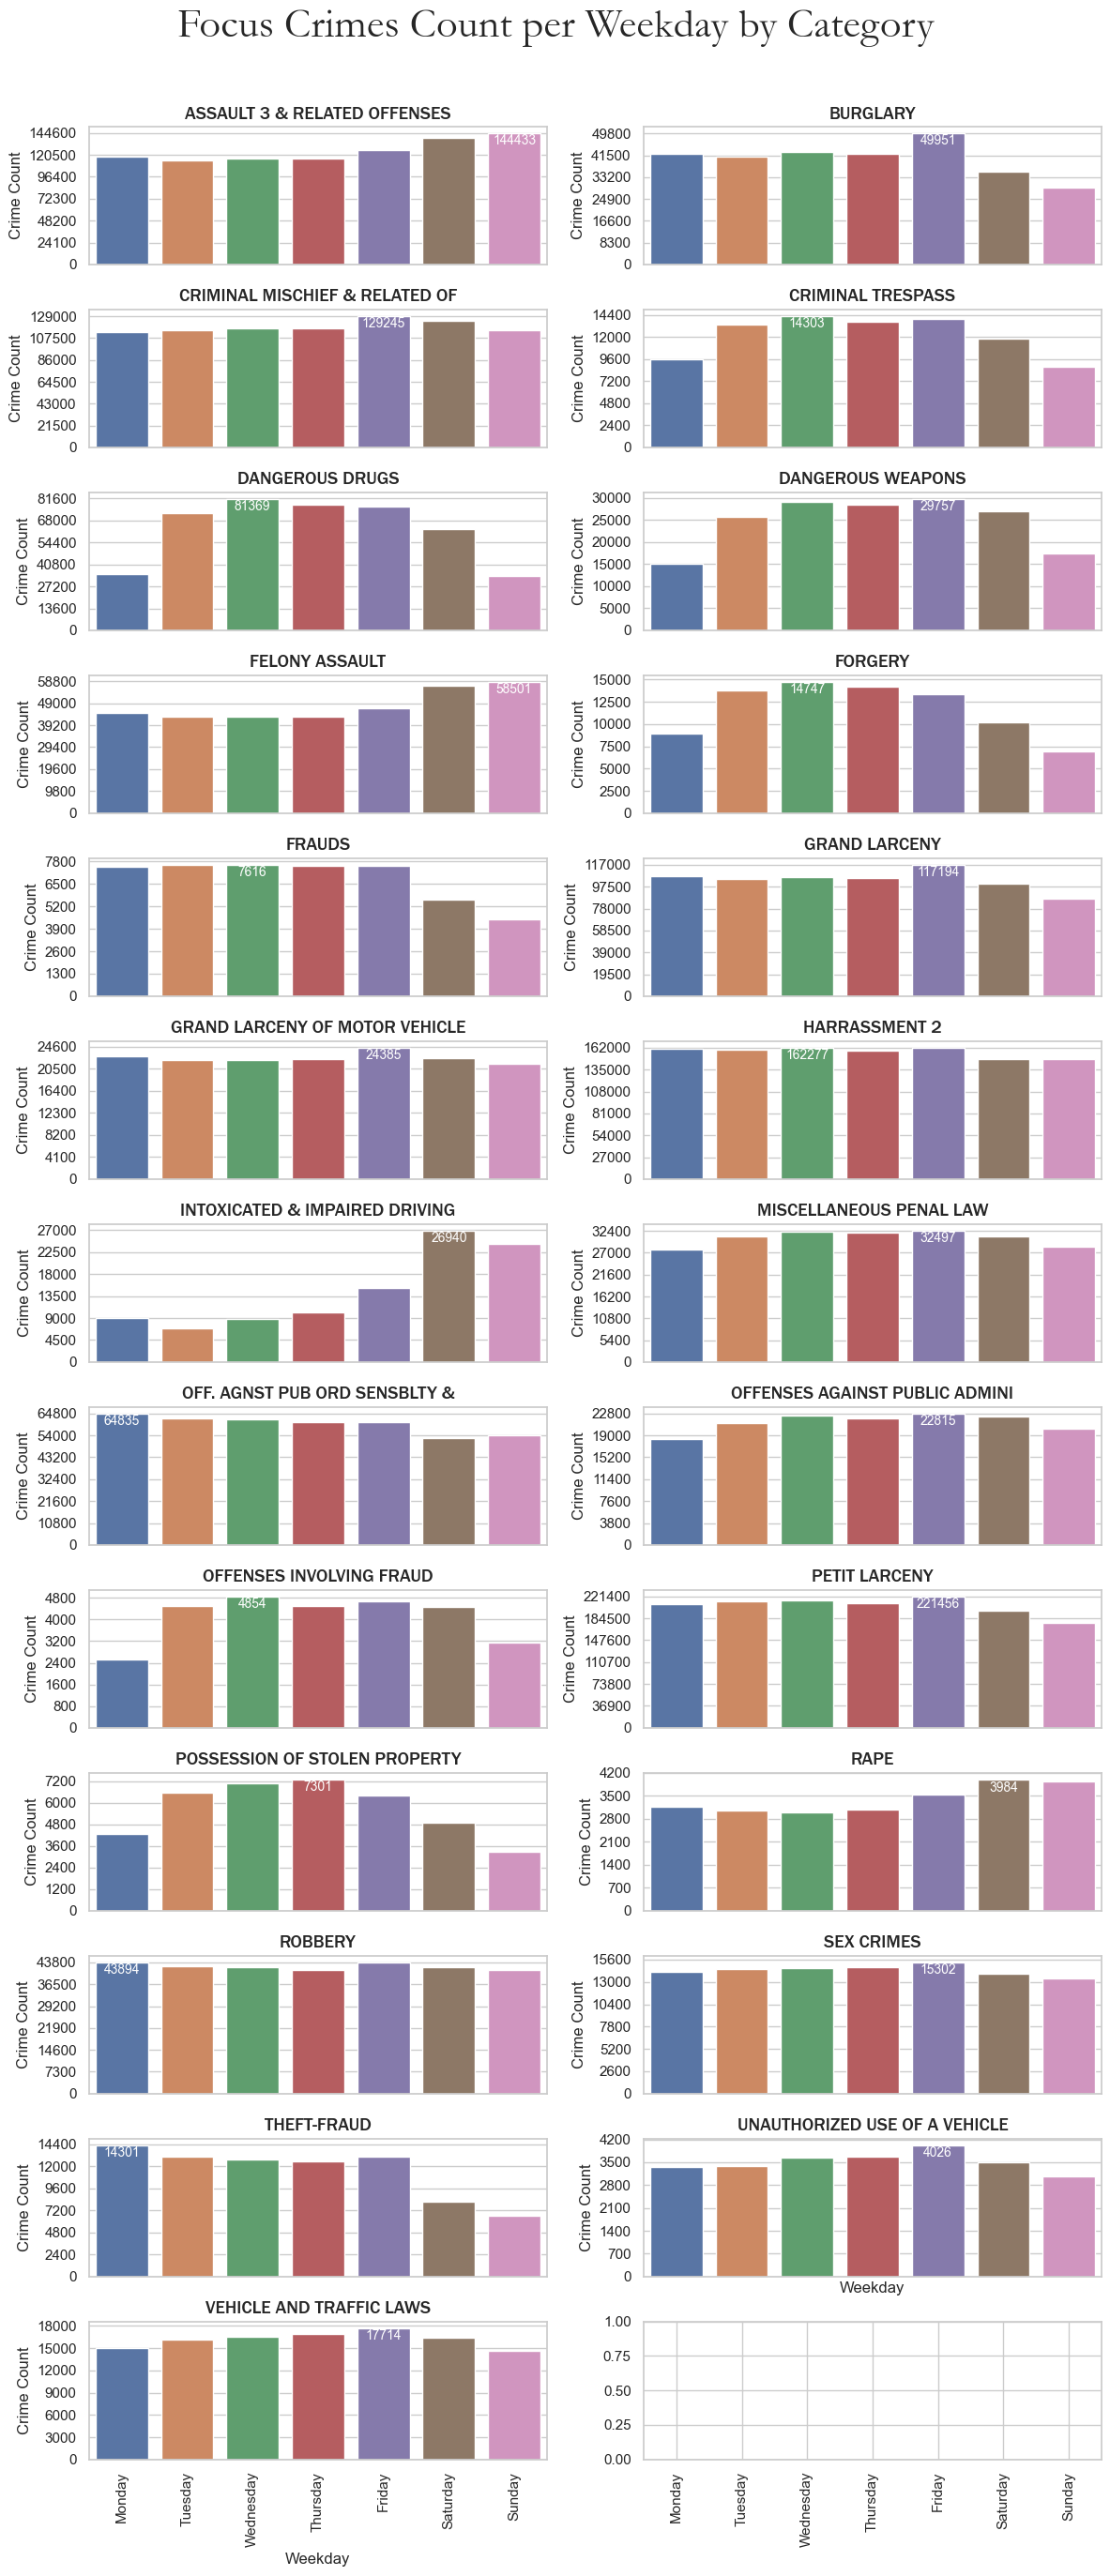

In [19]:
### Weekday Plot ###
sns.set_theme(style="whitegrid")
#sns.set_theme(style="darkgrid")
sns.color_palette("hls", 7) # 7 hues for categorical data
# Plot number of crimes per week day in subplots with shared x-axis
fig, axes = plt.subplots(nrows=13, ncols=2, figsize=(12, 28), sharex=True)
fig.suptitle('Focus Crimes Count per Weekday by Category', fontdict={'fontname': 'Garamond', 'weight': 'bold'}, size=32) # Large Serif font for capturing title
fig.subplots_adjust(top=0.95, hspace=0.5)  # Adjust the spacing to prevent overlap
focuscrimes = sorted(focuscrimes) # alphabetically sort focuscrimes for consistent order in subplots
weekday_mapping = {'Monday': 0, 'Tuesday': 1, 'Wednesday': 2, 'Thursday': 3, 'Friday': 4, 'Saturday': 5, 'Sunday': 6}

# create DayOfWeek column using 'Complaint_From_Date 
df['Complaint_From_Date'] = pd.to_datetime(df['Complaint_From_Date'])
df['DayOfWeek'] = df['Complaint_From_Date'].dt.day_name()

for i, crime in enumerate(focuscrimes):
    ax = axes[i//2, i%2]
    x = df[df['Offense_Description'] == crime]['DayOfWeek']  
    x = x.astype('category')
    x.cat.set_categories(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], ordered=True)
    y = x.value_counts().sort_index()
    sns.countplot(x=x, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], ax=ax) #color='b' if using same colour for all bars
    
    # annotate the the max count on the plot
    max_count = y.max()
    max_day = y.idxmax() # get the day with max count
    max_day_index = weekday_mapping[max_day] # get the index of the day with max count
    ax.text(max_day_index, max_count - max_count/9, max_count, ha='center', va='bottom', fontsize=10, color='white') # place annotation just under top of max bar

    ax.set_xlabel("Weekday" if i >= len(focuscrimes) - 2 else "") # Only label bottom plot of each column
    ax.set_ylabel("Crime Count") 
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)  # Rotate x-ticks
    ax.set_yticks(np.arange(0, y.max()+y.max()/10, round(y.max()/6,-2)))  # Adjust to only 7 y-ticks and must be multiples of 100
    ax.set_title(crime, fontdict={'fontname':'Franklin Gothic Medium', 'fontsize': 14}) # smaller sans-serif font for easy reading of subplots title
plt.xticks(rotation=90)  
plt.tight_layout(rect=[0, 0, 1, 0.97])  # Adjust the rect to fit the suptitle
plt.show()
# Note: I know it would be better with one colour, but it looks more colourful.

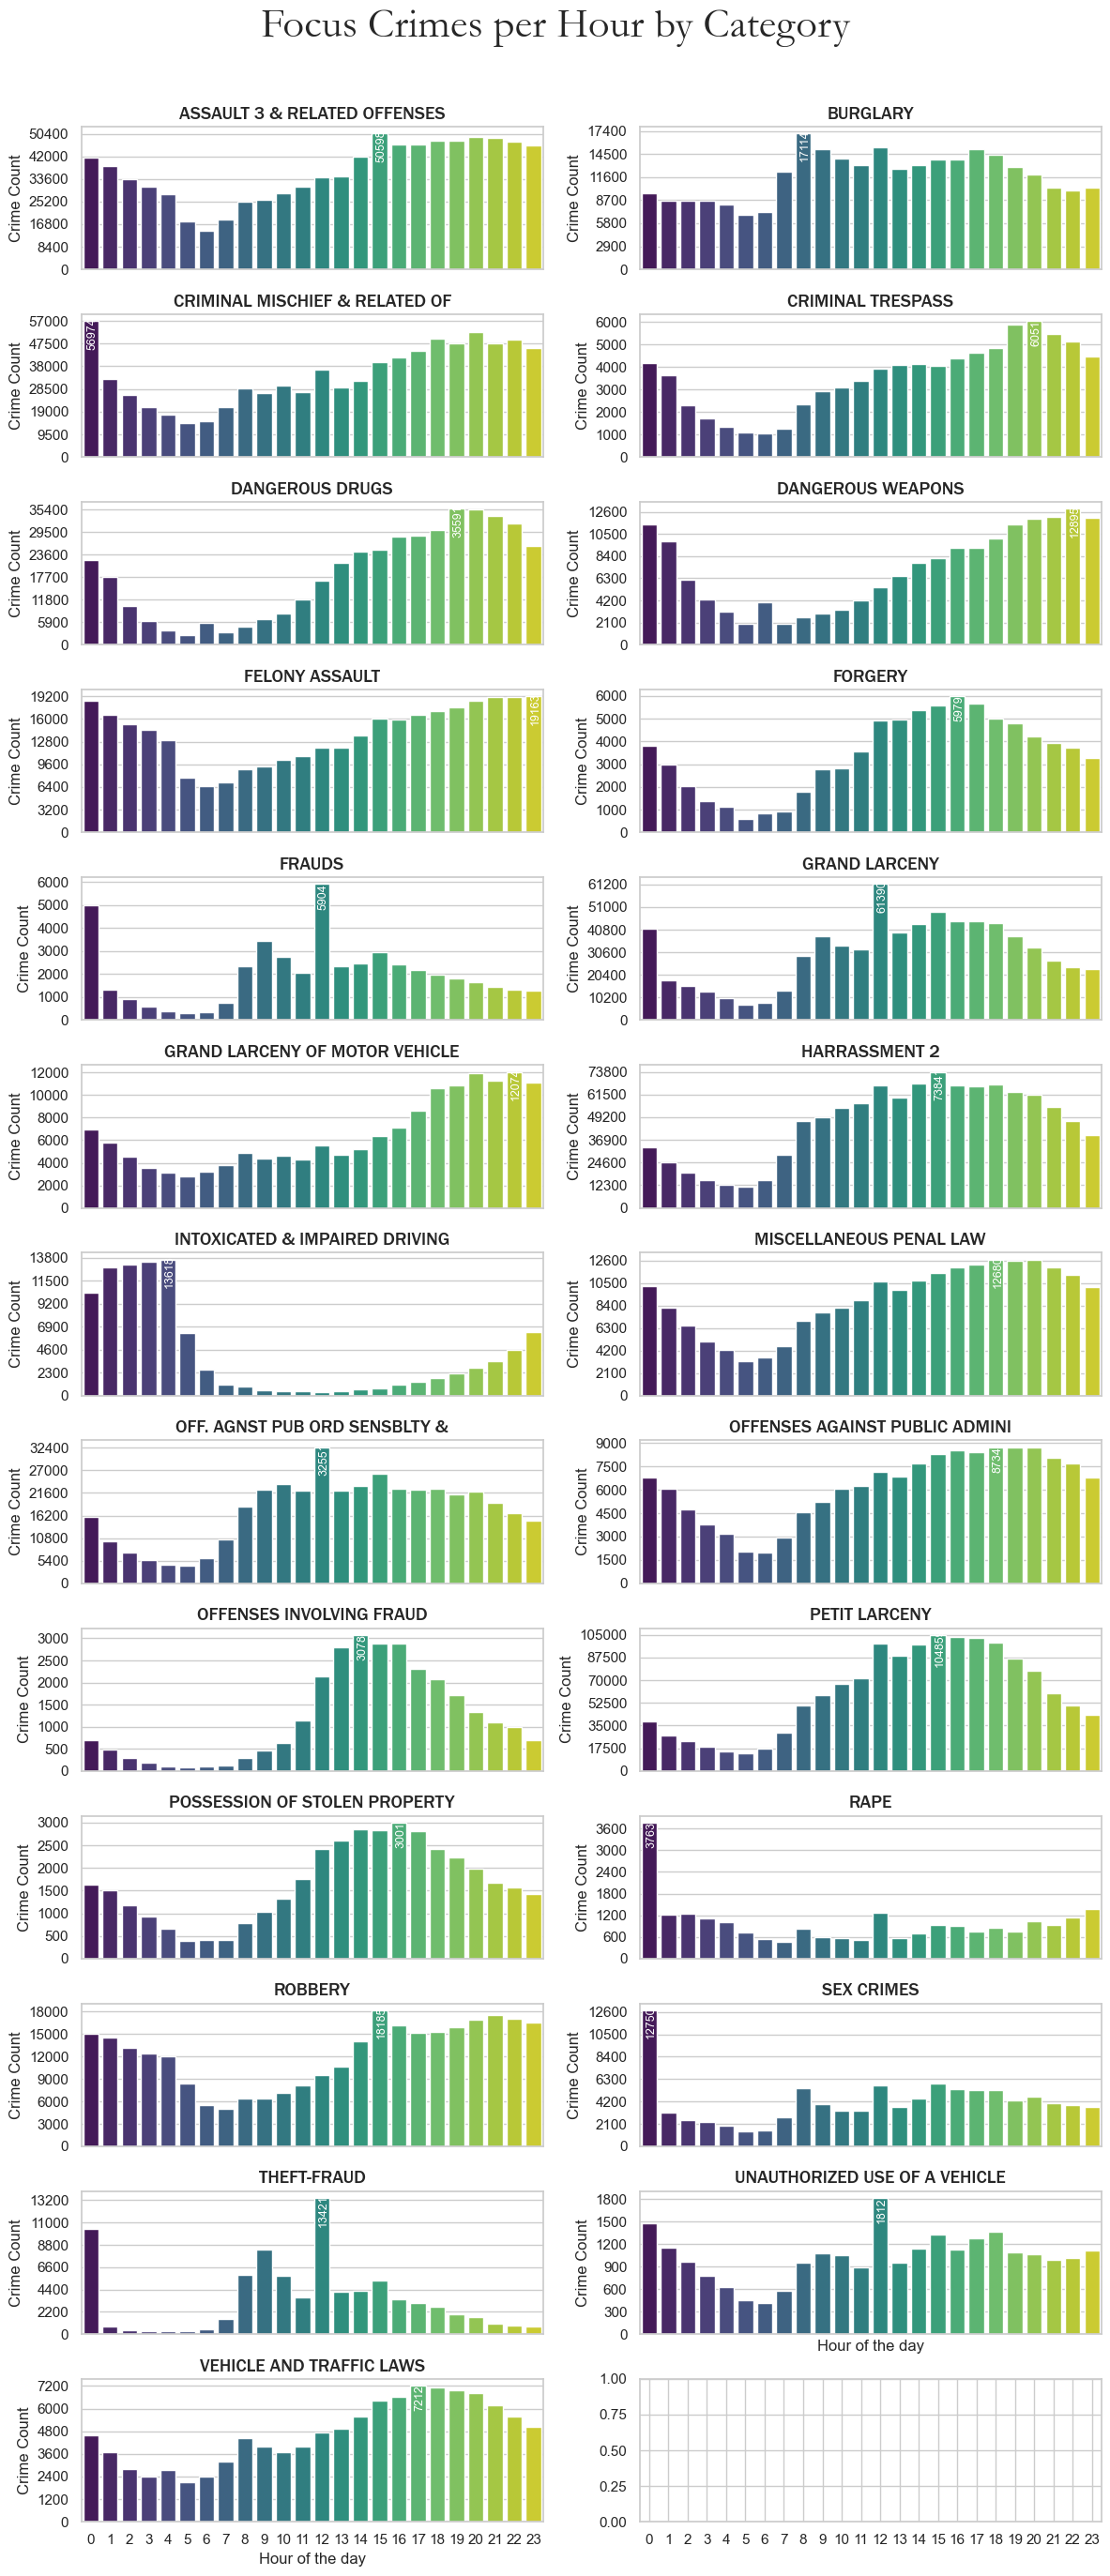

In [20]:
### 24-hour Plot ###
sns.set_palette('viridis') # 24 hours is more sequential than categorical therefore viridis is good
fig, axes = plt.subplots(nrows=13, ncols=2, figsize=(12, 28), sharex=True)
fig.suptitle('Focus Crimes per Hour by Category', fontdict={'fontname': 'Garamond', 'weight': 'bold'}, size=32)
fig.subplots_adjust(top=0.95, hspace=0.5)
hour_names = [f'{i}' for i in range(24)]

for i, crime in enumerate(focuscrimes):
    ax = axes[i//2, i%2]
    # Convert 'Time' to datetime and extract hour
    x = pd.to_datetime(df[df['Offense_Description'] == crime]['Complaint_From_Time'], format='%H:%M:%S').dt.hour
    x = x.astype('category').cat.set_categories(range(24), ordered=True)
    y = x.value_counts().sort_index()
    sns.countplot(x=x, order=range(24), ax=ax, palette='viridis')

    # annotate the the max count on the plot
    max_count = y.max()
    max_hour = y.idxmax() # get the day with max count
    ax.text(max_hour+0.1, max_count - max_count/11, max_count, ha='center', va='center', fontsize=9, color='white', rotation=90) # place annotation just under top of max bar

    ax.set_xlabel("Hour of the day" if i >= len(focuscrimes) - 2 else "")  # Only label bottom plot of each column
    ax.set_ylabel("Crime Count")
    ax.set_xticklabels(hour_names, rotation=0)  # Set hour names as x-tick labels
    ax.set_yticks(np.arange(0, y.max()+y.max()/10, round(y.max()/6, -2)))  # Adjust y-ticks
    ax.set_title(crime, fontdict={'fontname': 'Franklin Gothic Medium', 'fontsize': 14})
plt.tight_layout(rect=[0, 0, 1, 0.97])  # Adjust the rect to fit the suptitle
plt.show()
# Note: I know it would be better with one colour, but it looks more colourful.


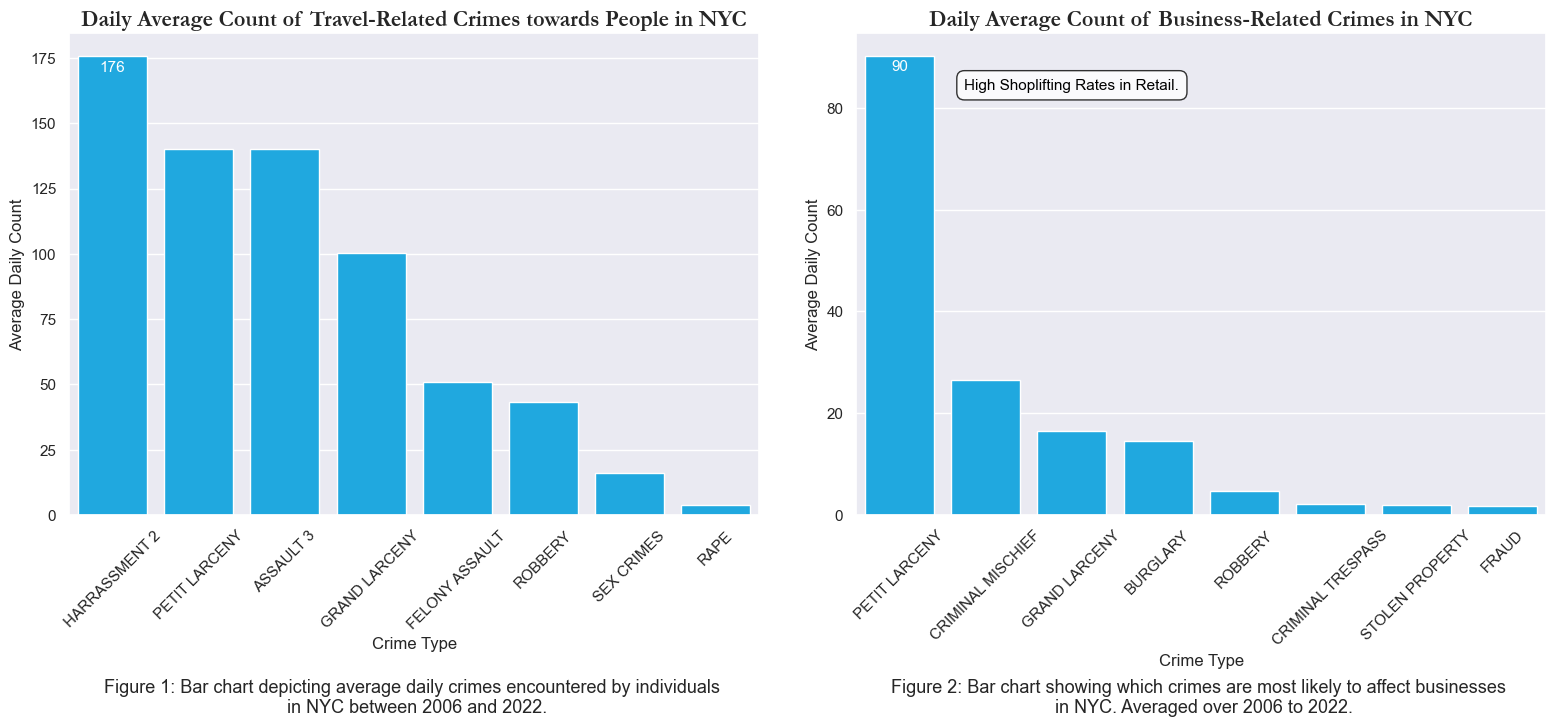

In [24]:
# rename "ASSAULT 3 & RELATED OFFENSES" to "ASSAULT 3"
df['Offense_Description'] = df['Offense_Description'].replace('ASSAULT 3 & RELATED OFFENSES', 'ASSAULT 3')
# change "Criminal Mischief & related offenses" to "CRIMINAL MISCHIEF"
df['Offense_Description'] = df['Offense_Description'].replace('CRIMINAL MISCHIEF & RELATED OF', 'CRIMINAL MISCHIEF')
# change "POSSESSION OF STOLEN PROPERTY" to "STOLEN PROPERTY"
df['Offense_Description'] = df['Offense_Description'].replace('POSSESSION OF STOLEN PROPERTY', 'STOLEN PROPERTY')
# change "OFFENSES INVOLVING FRAUD" to "FRAUD"
df['Offense_Description'] = df['Offense_Description'].replace('OFFENSES INVOLVING FRAUD', 'FRAUD')

# Top crimes that affect travel safety in NYC:
crimes_of_interest = ['PETIT LARCENY', 'HARRASSMENT 2', 'ASSAULT 3', 'GRAND LARCENY', 
    'FELONY ASSAULT', 'ROBBERY', 'SEX CRIMES', 'RAPE']
# Top crimes that affect businesses in NYC:
crimes_businesses = ['CRIMINAL TRESPASS', 'BURGLARY', 'CRIMINAL MISCHIEF', 'FRAUD', 
    'STOLEN PROPERTY', 'PETIT LARCENY', 'GRAND LARCENY', 'ROBBERY']

# Filter data for individual and business-related crimes, assuming 'Victim_Sex' includes 'D' for business
individual_data = df[df['Offense_Description'].isin(crimes_of_interest) & df['Victim_Sex'].isin(['F', 'M'])]
business_data = df[df['Offense_Description'].isin(crimes_businesses) & (df['Victim_Sex'] == 'D')]

# Calculate daily averages for both data sets
individual_counts = individual_data.groupby(['Complaint_From_Date', 'Offense_Description']).size().unstack(fill_value=0).mean()
business_counts = business_data.groupby(['Complaint_From_Date', 'Offense_Description']).size().unstack(fill_value=0).mean()

individual_counts = individual_counts.sort_values(ascending=False)
business_counts = business_counts.sort_values(ascending=False)

# Creating a multipanel plot
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))

# Plot for individuals
palette = sns.color_palette("hsv", 8) 
sns.barplot(x=individual_counts.index, y=individual_counts.values, ax=axs[0], color=palette[4])
axs[0].set_title('Daily Average Count of Travel-Related Crimes towards People in NYC', fontsize=16, fontdict={'fontname': 'Garamond', 'weight': 'bold'})
axs[0].set_ylabel('Average Daily Count', fontsize=12)
axs[0].set_xlabel('Crime Type', fontsize=12)
axs[0].tick_params(axis='x', rotation=45)
# add max count for Harrassment 2
max_count = int(individual_counts.max().round())
max_crime = individual_counts.idxmax()
max_crime_index = individual_counts.index.get_loc(max_crime)
axs[0].text(max_crime_index, max_count-max_count/24, f'{max_count}', ha='center', va='bottom', fontsize=11, color='white')

axs[0].text(0.5, -0.42, 'Figure 1: Bar chart depicting average daily crimes encountered by individuals \n in NYC between 2006 and 2022.',
             horizontalalignment='center', fontsize=13, transform=axs[0].transAxes, wrap=True, verticalalignment='bottom')

# Plot for businesses
sns.barplot(x=business_counts.index, y=business_counts.values, ax=axs[1], color=palette[4])
axs[1].set_title('Daily Average Count of Business-Related Crimes in NYC', fontsize=16, fontdict={'fontname': 'Garamond', 'weight': 'bold'})
axs[1].set_ylabel('Average Daily Count', fontsize=12)
axs[1].set_xlabel('Crime Type', fontsize=12)
axs[1].tick_params(axis='x', rotation=45)
# add max count 
max_count = int(business_counts.max().round())
max_crime = business_counts.idxmax()
max_crime_index = business_counts.index.get_loc(max_crime)
axs[1].text(max_crime_index, max_count-max_count/28, f'{max_count}', ha='center', va='bottom', fontsize=11, color='white')
# make an annotation on the max count "petit larceny" by writing  "shoplifting" on the plot
axs[1].text(max_crime_index+2, max_count-max_count/13, 'High Shoplifting Rates in Retail.', ha='center', va='bottom', fontsize=11, color='black',
            bbox=dict(facecolor='white', alpha=0.8, edgecolor='black', boxstyle='round,pad=0.5'))

axs[1].text(0.5, -0.42, 'Figure 2: Bar chart showing which crimes are most likely to affect businesses \n in NYC. Averaged over 2006 to 2022.',
             horizontalalignment='center', fontsize=13, transform=axs[1].transAxes, wrap=True, verticalalignment='bottom')
plt.tight_layout()

plt.savefig('daily_average_crime_comparison.png', bbox_inches='tight')
plt.show()


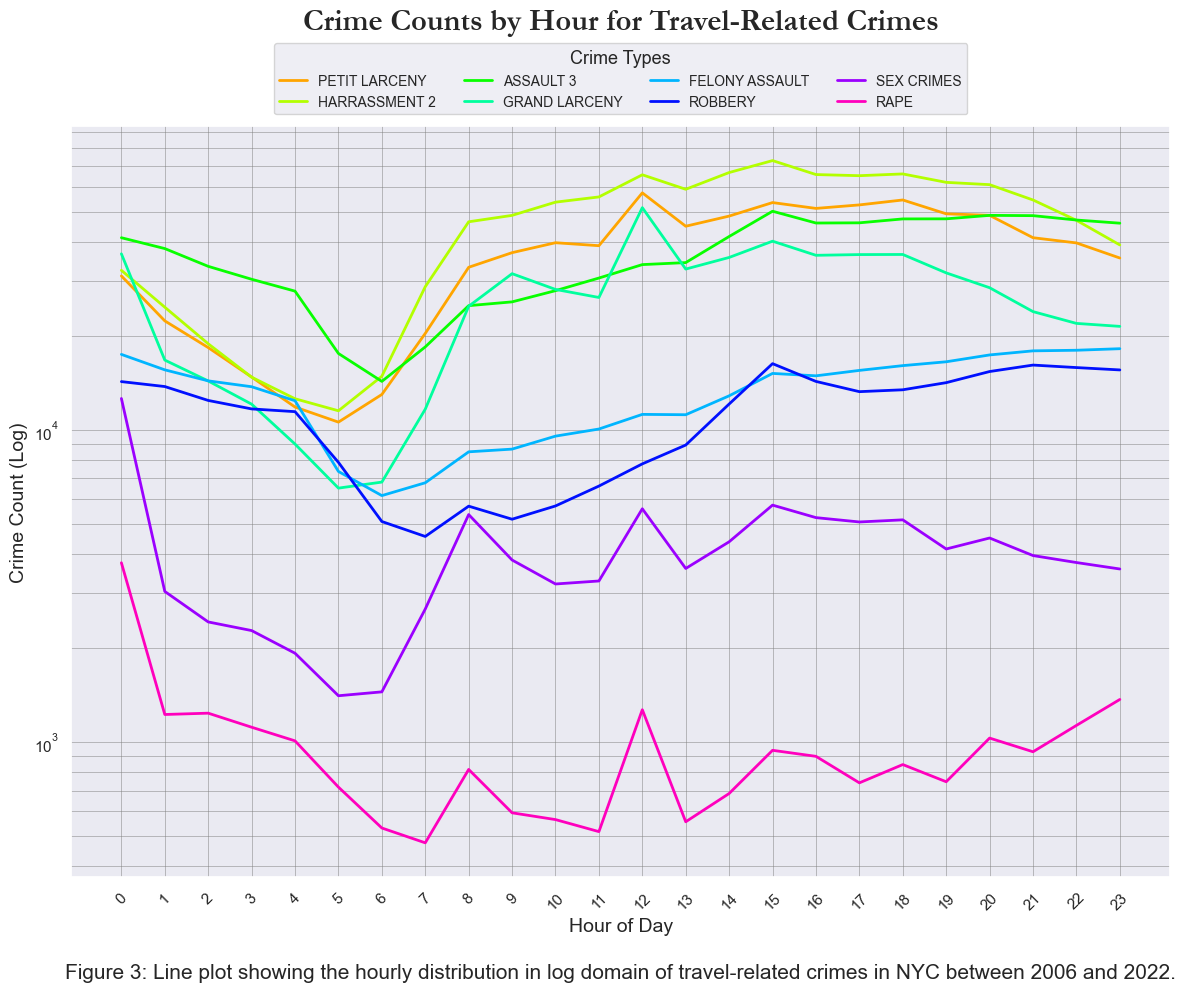

In [22]:
# Make line plot to show hourly changes in crime count for each of the top crimes
df['HourOfDay'] = pd.to_datetime(df['Complaint_From_Time']).dt.hour
# reindex by count of crimes
crimes_of_interest = ['PETIT LARCENY', 'HARRASSMENT 2', 'ASSAULT 3', 'GRAND LARCENY', 'FELONY ASSAULT', 'ROBBERY', 'SEX CRIMES', 'RAPE']

individual_data = df[df['Offense_Description'].isin(crimes_of_interest) & df['Victim_Sex'].isin(['F', 'M'])]
grouped = individual_data.groupby(['HourOfDay', 'Offense_Description']).size().unstack(fill_value=0)

# Ensure the hours are in the correct order, if necessary
hours_order = range(24)  # 0 to 23 hours
grouped = grouped.reindex(hours_order)
# Plot each crime type
plt.figure(figsize=(12, 10))
sns.set_style("darkgrid")
palette = sns.color_palette("hsv", len(crimes_of_interest))
for i, crime in enumerate(crimes_of_interest):
    sns.lineplot(x=grouped.index, y=grouped[crime], label=crime, color=palette[i], linewidth=2)

plt.title('Crime Counts by Hour for Travel-Related Crimes', fontsize=22, pad=70, fontdict={'fontname': 'Garamond', 'weight': 'bold'})
plt.xlabel('Hour of Day', fontsize=14)
plt.ylabel('Crime Count (Log)', fontsize=14)
plt.yscale('log')  # Log scale for better visualization of lower counts
plt.xticks(range(0, 24), rotation=45)  # Show every hour on the x-axis for better readability
# Customizing grid for better visibility
plt.grid(True, which="both", linestyle='-', color='gray', linewidth=0.5, alpha=0.7)
# Adjust the legend to not overlap the plot
plt.legend(title='Crime Types', title_fontsize='13', fontsize='10', loc='upper center', bbox_to_anchor=(0.5, 1.12), ncol=4)
# add caption saying 'Figure 3: Line plot showing the hourly distribution of travel-related crimes in NYC.'
plt.tight_layout(rect=[0, 0.05, 1, 0.95])  # Adjust the layout to fit the legend outside

plt.text(0.5, -0.14, 'Figure 3: Line plot showing the hourly distribution in log domain of travel-related crimes in NYC between 2006 and 2022.',
         horizontalalignment='center', fontsize=15, transform=plt.gca().transAxes, wrap=True, verticalalignment='bottom')
plt.tight_layout()
plt.savefig('hourly_crime_counts.png', bbox_inches='tight')
plt.show()

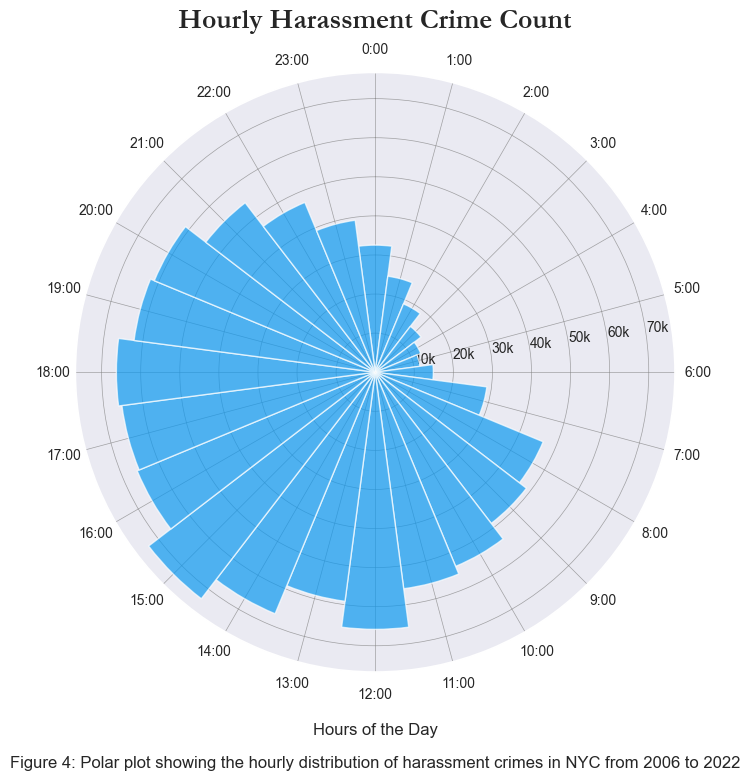

In [23]:
# Filter data for 'HARRASSMENT 2' crimes
harassment_data = df[df['Offense_Description'] == 'HARRASSMENT 2']
# filter for victim sex = "M" or "F"
harassment_data = harassment_data[harassment_data['Victim_Sex'].isin(['M', 'F'])]

# Extract hour information from the 'Time' column
#df['DayOfWeek'] = df['Complaint_From_Date'].dt.day_name()
#harassment_data['Hour'] = df['Complaint_From_Date'].dt.hour
# Complatin from date is formatted as such 06/18/2006
# Complaint_From_Time 16:30:00	
harassment_data['Hour'] = pd.to_datetime(harassment_data['Complaint_From_Time'], format='%H:%M:%S').dt.hour
#harassment_data['Hour'] = pd.to_datetime(harassment_data['Complaint_From_Date'], format='%H:%M').dt.hour

# Count occurrences for each hour
hour_counts = harassment_data['Hour'].value_counts().sort_index()

# Create a polar plot with each bar representing one hour
theta = np.radians(hour_counts.index * (360 / 24))  # Convert hours to degrees
width = np.radians(15)  # Set the width of each bar to 15 degrees (1 hour)
radii = hour_counts.values

# choose rbg color rgb(37, 150, 190)
samecolor = sns.color_palette('hsv',8)[4]
alphacolor = (12/255, 153/255, 240/255)
sns.set_style("darkgrid")

fig, ax = plt.subplots(subplot_kw={'projection': 'polar'}, figsize=(8,8))
bars = ax.bar(theta, radii, width=width, color=alphacolor, alpha=0.7)

ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)
ax.set_rlabel_position(82)

ax.set_title('Hourly Harassment Crime Count', va='bottom', fontdict={'fontname': 'Garamond', 'weight': 'bold'}, size=20)

# Add axis labels with hour names
ax.set_thetagrids(np.degrees(theta), labels=[f'{i}:00' for i in range(24)], fontsize=10)
ax.set_xlabel('Hours of the Day', labelpad=15)

# change y ticks such taht 10000 is displayed as 10k
import matplotlib.ticker as ticker
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:.0f}k'.format(x/1000)))
# set y tick ticks to size 10
ax.yaxis.set_tick_params(labelsize=10)

# show grid
ax.grid(True, which="both", linestyle='-', color='gray', linewidth=0.5, alpha=0.7)
# add caption saying 'Figure 4: Polar plot showing the hourly distribution of harassment crimes in NYC.'
plt.text(0.5, -0.16, 'Figure 4: Polar plot showing the hourly distribution of harassment crimes in NYC from 2006 to 2022',
         horizontalalignment='center', fontsize=12, transform=ax.transAxes)
plt.tight_layout(rect=[0, 0, 1, 1])  # Adjust the layout to fit the legend outside
plt.savefig('hourly_polar_plot.png', bbox_inches='tight')
plt.show()

These plots illustrate that there are significant temporal changes across all crime types. We have decided to focus on 8 crimes that are most relevant and common for travellers and a different 8 crimes that are most relevant and common for businesses. These plots are made using all of the cleaned data from 2006 to 2022. 

To narrow down and explore more in depth, we have a line plot illustrating the 24-hour changes in travel-related crimes towards people. This shows that some crimes are far more common on certain hours of the day, and can be used to avoid crime hotspots.

To further illustrate the temporal changes, we have a polar plot of harassmentof the 2nd degree whihc clearly shows that harassement is far more common during the day between 8am and 8pm.

#### Socioeconomic Data Analysis

The analysis aims to highlight potential societal problems that may contribute to increased crime activity in NYC. Here, we focus on examining data related to poverty levels and total enrollment in lower educational institutions between 2013 and 2018, as these factors have been suggested in previous studies to be causally linked to the overall rise in criminal activity. We explore the relationship between these variables through linear fitting, correlation coefficients, and visual inspection of several bar plots depicting crime rates across different NYC boroughs.

This section is designed to enhance users' understanding and potentially mitigate prejudice concerning the issue of crime. It is important to note that this page should not solely critique individuals who commit such crimes.

## Genre

Which genre of data story did you use?

- Which tools did you use from each of the 3 categories of Visual Narrative (Figure 7 in Segal and Heer). Why?
- Which tools did you use from each of the 3 categories of Narrative Structure (Figure 7 in Segal and Heer). Why?

## Visualizations
- Explain the visualizations you've chosen.
- Why are they right for the story you want to tell?

##### **Bar Charts**
Oliver, write stuff here

##### **Line & Polar Plot**
Oliver, write stuff here (also, I honestly cant read the figure text, we need to increase the size)


##### **Bokeh Plots**
Bokeh plots are employed to provide a quantitative visual representation of the occurrence of specific targeted crimes on an hourly basis, filtered for particular days and months. This feature aims to aid users in comprehending the concentration of focus crimes within their respective contexts. The interactive functionality is designed to offer a user-friendly and practical approach to generating an overview of the crimes, along with facilitating comparative visualizations.

These plots are intended to support the planning of cases involving individuals interacting with NYC, as illustrated through the use cases 1 and 2.

##### **Use Case 1**

The user-customizable heatmap is central to Use Case 1, providing a dynamic visualization that represents crime data spatially and temporally across New York City. This visualization is chosen because it allows users to interact with the data directly, adjusting parameters to see how crime hotspots change based on various factors such as time of day, type of crime, and date. Given our proposed user segment we believe this tool really compliments that narrative and could be a useful tool both for educational and practical purposes. We spent a lot of time on the visualization of Use Case 1 to accomplish the following features which we deem important:
##### User-Customizable Heatmap
- **Interactive Experience**: Allows users to interact with and manipulate the data to see how crime hotspots change based on time, type, and location. This empowers users, making the data relevant and personalized to their needs.
- **Practical Use**: Users can plan their movements around the city more safely by visualizing crime patterns related to their personal schedules or routes.
##### Navigation Features
- **Actionable Insights**: Integrates practical navigation tools with crime data, providing users with safe travel routes. This direct application helps in transforming abstract crime data into concrete safety measures.
- **Enhanced Engagement**: Users are more likely to use and benefit from a tool that actively helps them navigate through, and avoid, high-risk areas.
#####  NYPD Precinct Locations
- **Resource Visibility**: Shows where NYPD precincts are located, providing users with knowledge of nearby law enforcement resources, which can be reassuring.
- **Contextual Understanding**: Enhances the reliability of the tool by contextualizing crime data with police presence, offering insights into safety resource distribution across the city.

##### Behind the visualization
- The entire code for the visualization can be seen in the file "html_templates/usecase1.html" and the data prep in "data analysis & preprocessing/heatmap-prep.ipynb"
- The heatmap was constructed using "Leaflet" which is an interactive Javascript library for maps
- The input controls were built in Javascript
- The route planner was built using Mapbox api
- The data for the NYDP precints was extracted from [Precincts](https://www.nyc.gov/site/nypd/bureaus/patrol/precincts-landing.page)

##### **Use Case 2**

The visualizations for Use Case 2 are designed to provide a comprehensive tool for business owners to identify the safest and most strategic locations for their businesses in New York City. By combining crime data with socioeconomic factors and interactive markers, the tool not only informs about potential risks but also facilitates a holistic approach to business location planning. This ensures that decisions are well-rounded, taking into account both security and community characteristics, thereby aligning with the overarching goal of enhancing the safety of New Yorkers through data-driven insights.

##### User-Customizable Crime Heatmap
- **Interactive Analysis**: Allows users to explore crime data specifically targeting businesses across New York City. This interactivity helps in understanding local crime dynamics affecting business locations.
- **Direct Application**: Business owners can visualize and assess potential risks in different areas, helping them to make informed decisions about where to set up or relocate their operations.

##### Movable Markers for Potential Business Locations
- **Practical Planning Tool**: Users can place up to five markers on the map to consider potential business locations. This feature enables interactive exploration of safety considerations for multiple locations simultaneously.
- **Spatial Decision Support**: By moving markers and observing changes in the heatmap, users can dynamically assess the impact of crime on potential business sites, leading to optimized location strategies.

##### Toggleable Socioeconomic Features
- **Contextual Insights**: The ability to toggle various borough-level socioeconomic features (like population density, economic status, and demographic profiles) provides deeper insights into the broader context that might influence crime rates and business success.
- **Enhanced Decision Making**: These features allow users to consider not just crime but also economic and social factors that are crucial for strategic business planning and location selection.

##### Behind the visualization
- The entire code for the visualization can be seen in the file "html_templates/usecase2.html" and the data prep in "data analysis & preprocessing/heatmap-prep.ipynb"
- The heatmap was constructed using "Leaflet" which is an interactive Javascript library for maps
- The input controls were built in Javascript
- The socioeconomic data was taken from the dataset "2020 Census Data-census tracts & higher" which was downloaded on [2020 Census](https://www.nyc.gov/site/planning/planning-level/nyc-population/2020-census.page)

##### **Socioeconomic Plots**
The following plots were created for this section: 
- **Linear fit**: A linear fit was applied between poverty and total enrollment to highlight a potential relationship between variables, which, as indicated in referenced papers, may contribute to an increased occurrence of crime. The correlation coefficient between the variables was also calculated.
- **Bar plots**: Across the boroughs of NYC, the reported number of individuals relative to the population is visualized for comparative purposes, both unnormalized and normalized. Additionally, the occurrence of crime incidents, relative to the proportion of the population in each borough, is depicted through a separate bar plot. Here, a comparative analysis is utilized to illustrate the possible connection between boroughs with high poverty rates and a high occurrence of crimes.

## Discussion

- What went well?,
- What is still missing? What could be improved?, Why?

#### Johan's Notes: What went well?,
- In the final project we believe we have achieved a more compelling and interactive data story than the previous one. This, was in part due to the lack of restrictions on the number of figures. The added real-estate enabled us to make several high quality visualizations such as the Bokeh plots and Use Cases which enable the user to truly dive down into the data and conduct data exploration themselves. 
- We also believe we were able to achieve a new level of depth in our story, integrating multiple sources of data that compliment each other
- We had a great emphasis on user-interactivity and we believe we achieved an impressive standard given the restrictions of a static webpage such as Github Pages

#### Johan's Notes: What is still missing? What could be improved?, Why?
- With more time we would have loved to dive even deeper into the nitty gritty details of crime prevention and perhaps investigate crime from a more practical perspective such as tips and tricks that the everyday citizen could employ to minimize the rist of being victim of a crime
- Given our backgrounds studying AI & Data We would also have loved to conduct actual machine learning research, perhaps to create models for preventative measures or to quantify risk levels for given circumstances, etc. One could even envision that the data the user inputs on the interactive maps could be passed as input for a ML model. 
- It would have been very interesting to spend more time on the interplay between socioeconomics and crime, perhaps including those in the aforementioned ML models


## Contributions
Who did what?

- You should write (just briefly) which group member was the main responsible for which elements of the assignment. (I want you guys to understand every part of the assignment, but usually there is someone who took lead role on certain portions of the work. That's what you should explain).
- It is not OK simply to write "All group members contributed equally".


#### Johan Böcher Hanehøj - s194495 (primary responsibilities)
- Website creation and maintenance
- Creating/managing the project backlog (github projects) 
- Usecase 1 (creation of the visualization and the related dataprocessing / text writing / research)
- Usecase 2 (creation of the visualization and the related dataprocessing / text writing / research)
- Explainer Notebook


#### Oliver Rosbæk Elmgreen - s204070 (primary responsibilities)
- Initial data cleaning and preprocessing
- Introduction, focus crimes (temporal changes), summary sections on website (visualizations / text / research)
- Motivation, Basic Stats & Data cleaning, Temporal Data Analysis in explainer notebook
- Formalia and structure choices (colour theme, font, fig sizes & captions, inserting citations, narrative structure) 
- Proofreading ('røde tråd') and incorporating feedback from assignment 2


#### Benjamin Kock Fazal - s200431 (primary responsibilities)
- Bokeh plots (creation of the visualization and the related dataprocessing / text writing / research)
- Section regarding Socioeconomic angle (visualizations / text / research)
- Linear fit
- Correlation calculations 